In [114]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Data Preperation

In [161]:
def add_is_greater_column(df, column_name):
    new_column_name = f'{column_name}_Is_Greater'
    df[new_column_name] = (df[column_name] > df[column_name].shift(1)).astype(int)


In [166]:
df_1 = pd.read_csv('round-2-island-data-bottle/prices_round_2_day_-1.csv',delimiter=';')
df_2 = pd.read_csv('round-2-island-data-bottle/prices_round_2_day_0.csv',delimiter=';')
df_3 = pd.read_csv('round-2-island-data-bottle/prices_round_2_day_1.csv',delimiter=';')

In [167]:
for df in [df_1, df_2, df_3]:
    # List of specified columns
    columns = ['ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
    
    # Calculate the absolute difference between consecutive rows for each specified column
    for column in columns:
        df[f'diff_{column}'] = df[column].diff()
    df.set_index('timestamp', inplace=True)
    # Your df_1 will now have new columns with names 'abs_diff_ORCHIDS', 'abs_diff_TRANSPORT_FEES', etc.,
    # containing the absolute differences for each respective column.
    df['target'] = (df['ORCHIDS'].diff() > 0).astype(int).shift(-1)
    df['TOTAL_TARIFF'] = -  df['IMPORT_TARIFF'] + df['EXPORT_TARIFF'] + df['TRANSPORT_FEES']
    df['TOTAL_TARIFF_2'] = -  df['IMPORT_TARIFF'] + df['EXPORT_TARIFF'] + 2* df['TRANSPORT_FEES']
    df['TOTAL_TARIFF_multiplied'] = ( - df['IMPORT_TARIFF'] + df['EXPORT_TARIFF'] )* df['TRANSPORT_FEES']
    columns = ['TOTAL_TARIFF', 'TOTAL_TARIFF_2', 'TOTAL_TARIFF_multiplied']
    for column in columns:
        add_is_greater_column(df, column)

In [168]:
df_1 = df_1.iloc[1:]
df_2 = df_2.iloc[1:]
df_3 = df_3.iloc[1:]

In [169]:
df = pd.concat([df_1, df_2, df_3])

In [130]:
# Assuming 'df' is your DataFrame
df = df.dropna()

# After this operation, 'df' will only contain rows without any NaN values.
df.reset_index()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,diff_ORCHIDS,diff_TRANSPORT_FEES,...,diff_IMPORT_TARIFF,diff_SUNLIGHT,diff_HUMIDITY,target,TOTAL_TARIFF,TOTAL_TARIFF_2,TOTAL_TARIFF_multiplied,TOTAL_TARIFF_Is_Greater,TOTAL_TARIFF_2_Is_Greater,TOTAL_TARIFF_multiplied_Is_Greater
0,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1,1.75,0.0,...,0.0,-0.5803,0.00410,0.0,13.0,14.5,17.25,0,0,0
1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1,0.00,0.0,...,0.0,-0.5740,0.00411,0.0,13.0,14.5,17.25,0,0,0
2,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1,0.00,0.0,...,0.0,-0.5677,0.00413,0.0,13.0,14.5,17.25,0,0,0
3,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1,0.00,0.0,...,0.0,-0.5614,0.00415,0.0,13.0,14.5,17.25,0,0,0
4,500,1200.25,1.5,9.5,-2.0,2497.1614,79.02066,-1,-1.50,0.0,...,0.0,-0.5552,0.00417,1.0,13.0,14.5,17.25,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,999500,1038.75,0.9,9.5,-5.0,2299.9330,69.91952,1,-1.00,0.0,...,0.0,0.0092,0.01591,0.0,15.4,16.3,13.05,0,0,0
29993,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1,-2.50,0.0,...,0.0,0.0106,0.01597,0.0,15.4,16.3,13.05,0,0,0
29994,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1,0.00,0.0,...,0.0,0.0120,0.01604,0.0,15.4,16.3,13.05,0,0,0
29995,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1,0.00,0.0,...,0.0,0.0134,0.01609,0.0,15.4,16.3,13.05,0,0,0


# ACF and autocorrelation of the features

In [82]:
df_1

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,diff_ORCHIDS,diff_TRANSPORT_FEES,diff_EXPORT_TARIFF,diff_IMPORT_TARIFF,diff_SUNLIGHT,diff_HUMIDITY,target
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,-1,1.75,0.0,-1.0,0.0,-0.5803,0.004100,0.0
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,-1,0.00,0.0,0.0,0.0,-0.5740,0.004110,0.0
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,-1,0.00,0.0,0.0,0.0,-0.5677,0.004130,0.0
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,-1,0.00,0.0,0.0,0.0,-0.5614,0.004150,0.0
5,500,1200.25,1.5,9.5,-2.0,2497.1614,79.020660,-1,-1.50,0.0,0.0,0.0,-0.5552,0.004170,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764,-1,-1.00,0.0,0.0,0.0,-0.4938,-0.006476,0.0
9997,999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300,-1,-1.00,0.0,0.0,0.0,-0.4918,-0.006464,1.0
9998,999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856,-1,1.00,0.0,0.0,0.0,-0.4892,-0.006444,1.0
9999,999900,1228.00,1.4,8.5,-3.0,3900.4849,83.006424,-1,0.25,0.0,0.0,0.0,-0.4871,-0.006432,0.0


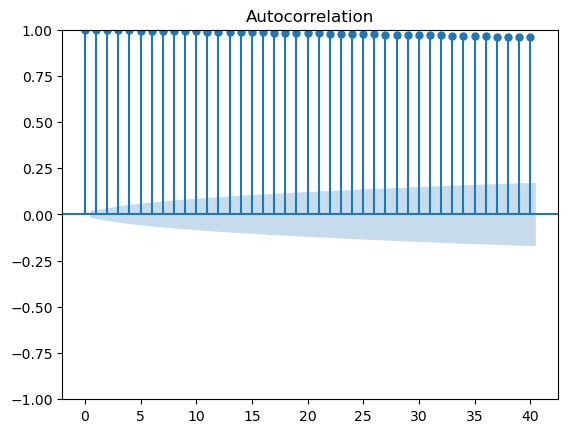

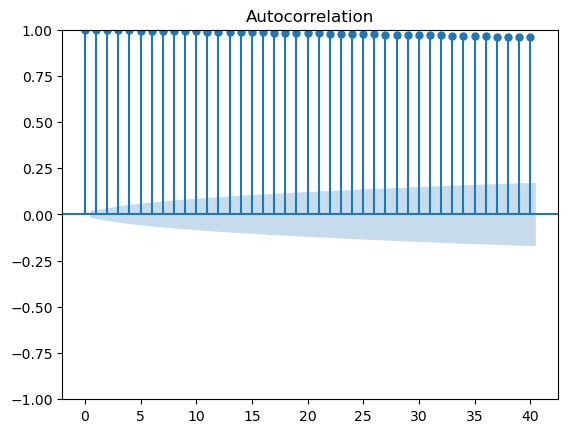

In [85]:
plot_acf(df_1["ORCHIDS"])

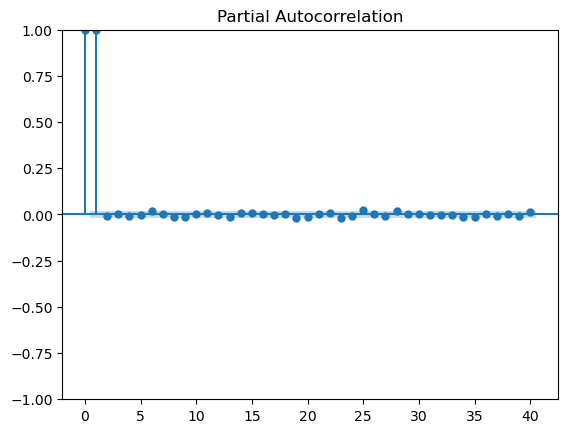

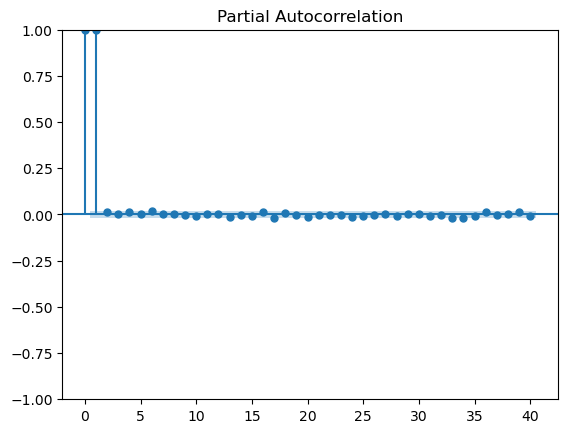

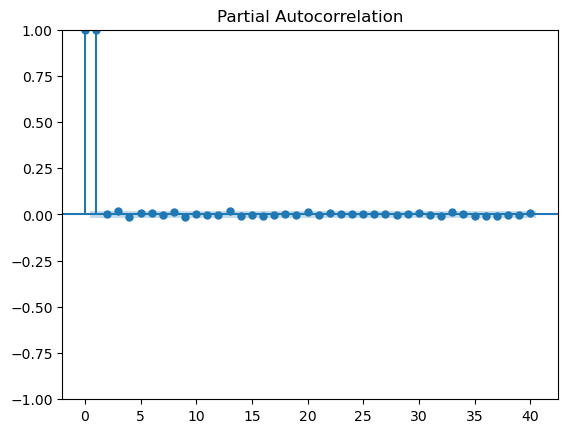

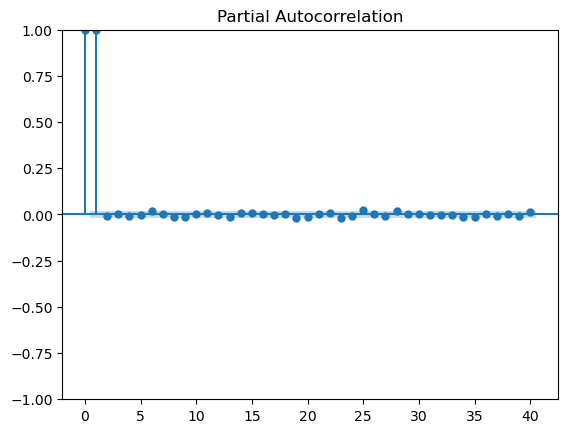

In [88]:
plot_pacf(df_1["ORCHIDS"])
plot_pacf(df_2["ORCHIDS"])
plot_pacf(df_3["ORCHIDS"])

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load your datasets and combine them
# For demonstration, I will use the iris dataset
X = df[['ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY',"diff_ORCHIDS","diff_TRANSPORT_FEES","diff_EXPORT_TARIFF","diff_IMPORT_TARIFF","diff_SUNLIGHT","diff_HUMIDITY"] ]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


# Define the parameter grid you want to search over
param_grid = {
    'n_estimators': [5,10, 20, 30,50, 70,100],
    'max_depth': [1,2,3,5, 10],
    'min_samples_split': [1,2, 5, 10],
    'min_samples_leaf': [1, 2, 4,6,8],
    #maybe you can add learning rate
    # Add other parameters if needed
}

# Create a RandomForestClassifier instance
rf_clf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV instance with the RandomForestClassifier
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV instance to your data
grid_search.fit(X_test, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", best_params)


Fitting 5 folds for each of 700 candidates, totalling 3500 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  11.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  10.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  10.5s
[CV] EN

/Users/juliusgruber/anaconda3/envs/MarketMicroStructure/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
875 fits failed out of a total of 3500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
875 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/juliusgruber/anaconda3/envs/MarketMicroStructure/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/juliusgruber/anaconda3/envs/MarketMicroStructure/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/juliusgruber/anaconda3/envs/MarketMicroStruc

# Random Forest Approach

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [64]:
model = RandomForestClassifier(random_state=42, **best_params)

In [65]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=5, random_state=42)

In [66]:
y_pred = model.predict(X_test)

In [73]:
len(y_pred) 

6000

In [79]:
sum(y_pred)

0.0

In [77]:
r2_score(y_test, y_pred)

-0.7291066282420746

In [68]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.58
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73      3470
         1.0       0.00      0.00      0.00      2530

    accuracy                           0.58      6000
   macro avg       0.29      0.50      0.37      6000
weighted avg       0.33      0.58      0.42      6000



/Users/juliusgruber/anaconda3/envs/MarketMicroStructure/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliusgruber/anaconda3/envs/MarketMicroStructure/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliusgruber/anaconda3/envs/MarketMicroStructure/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

# Constructing the TransferSignal

In [145]:
df_2

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,diff_ORCHIDS,diff_TRANSPORT_FEES,diff_EXPORT_TARIFF,diff_IMPORT_TARIFF,diff_SUNLIGHT,diff_HUMIDITY,target,TOTAL_TARIFF,TOTAL_TARIFF_2,TOTAL_TARIFF_multiplied,TOTAL_TARIFF_Is_Greater,TOTAL_TARIFF_2_Is_Greater,TOTAL_TARIFF_multiplied_Is_Greater
timestamp,,,,,,,,,,,,,,,,,,,,
100,1111.75,1.5,10.5,-2.0,4500.0356,94.995990,0,0.00,0.0,0.0,0.0,0.0356,-0.004010,0.0,14.0,15.5,18.75,0,0,0
200,1109.75,1.5,10.5,-2.0,4500.0700,94.991980,0,-2.00,0.0,0.0,0.0,0.0344,-0.004010,0.0,14.0,15.5,18.75,0,0,0
300,1109.25,1.5,10.5,-2.0,4500.1016,94.987970,0,-0.50,0.0,0.0,0.0,0.0316,-0.004010,1.0,14.0,15.5,18.75,0,0,0
400,1110.75,1.5,10.5,-2.0,4500.1313,94.983950,0,1.50,0.0,0.0,0.0,0.0297,-0.004020,0.0,14.0,15.5,18.75,0,0,0
500,1110.75,1.5,10.5,-2.0,4500.1590,94.979935,0,0.00,0.0,0.0,0.0,0.0277,-0.004015,0.0,14.0,15.5,18.75,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999600,988.25,1.3,10.5,-2.6,1703.5710,64.989100,0,-1.00,0.0,0.0,0.0,-0.8841,0.002700,0.0,14.4,15.7,17.03,0,0,0
999700,988.00,1.3,10.5,-2.6,1702.6835,64.991806,0,-0.25,0.0,0.0,0.0,-0.8875,0.002706,1.0,14.4,15.7,17.03,0,0,0
999800,988.75,1.3,10.5,-2.6,1701.7925,64.994530,0,0.75,0.0,0.0,0.0,-0.8910,0.002724,0.0,14.4,15.7,17.03,0,0,0


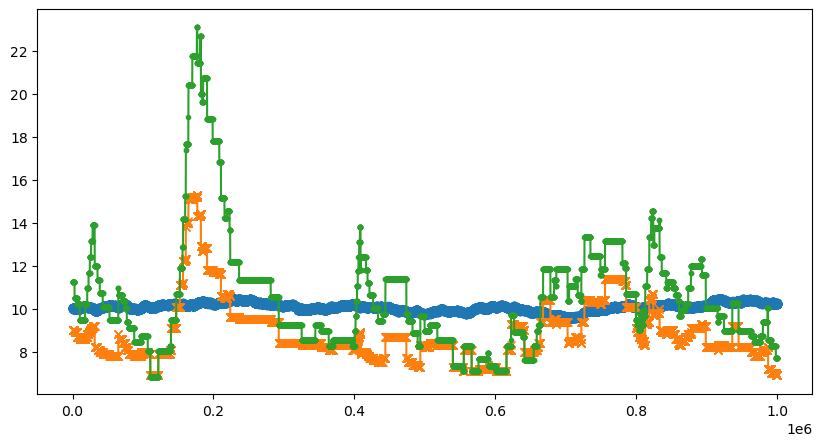

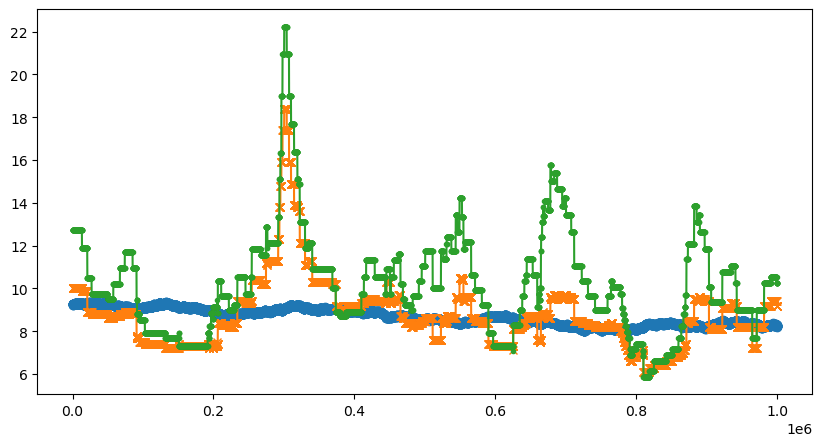

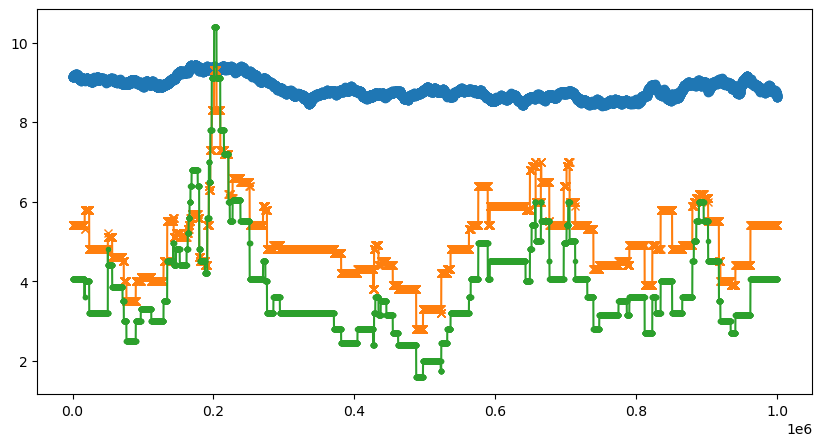

In [107]:
for df in [df_1, df_2, df_3]:
    
    
    # Plotting
    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.plot(df['ORCHIDS']/120, label='ORCHIDS', marker='o')  # Plot Column1
    plt.plot(df['TOTAL_TARIFF'], label='TOTAL_TARIFF', marker='x')  # Plot Column2
    plt.plot(df['TOTAL_TARIFF_multiplied'], label='TOTAL_TARIFF_multiplied', marker='.')  # Plot Column2


In [113]:
for df in [df_1, df_2, df_3]:
    data = df[['ORCHIDS', 'TOTAL_TARIFF_multiplied']]

    # Perform the Granger causality test
    results = grangercausalitytests(data, maxlag=4, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0784  , p=0.2991  , df_denom=9995, df_num=1
ssr based chi2 test:   chi2=1.0788  , p=0.2990  , df=1
likelihood ratio test: chi2=1.0787  , p=0.2990  , df=1
parameter F test:         F=1.0784  , p=0.2991  , df_denom=9995, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6107  , p=0.5430  , df_denom=9992, df_num=2
ssr based chi2 test:   chi2=1.2219  , p=0.5428  , df=2
likelihood ratio test: chi2=1.2218  , p=0.5429  , df=2
parameter F test:         F=0.6107  , p=0.5430  , df_denom=9992, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1539  , p=0.3258  , df_denom=9989, df_num=3
ssr based chi2 test:   chi2=3.4641  , p=0.3254  , df=3
likelihood ratio test: chi2=3.4635  , p=0.3255  , df=3
parameter F test:         F=1.1539  , p=0.3258  , df_denom=9989, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9480  , p=0.

/Users/juliusgruber/anaconda3/envs/MarketMicroStructure/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/juliusgruber/anaconda3/envs/MarketMicroStructure/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/juliusgruber/anaconda3/envs/MarketMicroStructure/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [121]:
#check predictive performance

In [175]:
df_1.dropna(inplace=True)
df_2.dropna(inplace=True)
df_3.dropna(inplace=True)

In [170]:
df_1["target"]

timestamp
100        0.0
200        0.0
300        0.0
400        0.0
500        1.0
          ... 
999600     0.0
999700     1.0
999800     1.0
999900     0.0
1000000    NaN
Name: target, Length: 10000, dtype: float64

In [171]:
df_1["TOTAL_TARIFF"]

timestamp
100        13.0
200        13.0
300        13.0
400        13.0
500        13.0
           ... 
999600     12.9
999700     12.9
999800     12.9
999900     12.9
1000000    12.9
Name: TOTAL_TARIFF, Length: 10000, dtype: float64

In [172]:
df_1

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,diff_ORCHIDS,diff_TRANSPORT_FEES,diff_EXPORT_TARIFF,diff_IMPORT_TARIFF,diff_SUNLIGHT,diff_HUMIDITY,target,TOTAL_TARIFF,TOTAL_TARIFF_2,TOTAL_TARIFF_multiplied,TOTAL_TARIFF_Is_Greater,TOTAL_TARIFF_2_Is_Greater,TOTAL_TARIFF_multiplied_Is_Greater
timestamp,,,,,,,,,,,,,,,,,,,,
100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,-1,1.75,0.0,-1.0,0.0,-0.5803,0.004100,0.0,13.0,14.5,17.25,0,0,0
200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,-1,0.00,0.0,0.0,0.0,-0.5740,0.004110,0.0,13.0,14.5,17.25,0,0,0
300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,-1,0.00,0.0,0.0,0.0,-0.5677,0.004130,0.0,13.0,14.5,17.25,0,0,0
400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,-1,0.00,0.0,0.0,0.0,-0.5614,0.004150,0.0,13.0,14.5,17.25,0,0,0
500,1200.25,1.5,9.5,-2.0,2497.1614,79.020660,-1,-1.50,0.0,0.0,0.0,-0.5552,0.004170,1.0,13.0,14.5,17.25,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764,-1,-1.00,0.0,0.0,0.0,-0.4938,-0.006476,0.0,12.9,14.3,16.10,0,0,0
999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300,-1,-1.00,0.0,0.0,0.0,-0.4918,-0.006464,1.0,12.9,14.3,16.10,0,0,0
999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856,-1,1.00,0.0,0.0,0.0,-0.4892,-0.006444,1.0,12.9,14.3,16.10,0,0,0


In [176]:
from sklearn.metrics import r2_score, accuracy_score

# Printing R^2 scores
print("R^2 Score for TOTAL_TARIFF:", r2_score(df_1["TOTAL_TARIFF_Is_Greater"], df_1["target"]))
print("R^2 Score for TOTAL_TARIFF_2:", r2_score(df_1["TOTAL_TARIFF_2_Is_Greater"], df_1["target"]))
print("R^2 Score for TOTAL_TARIFF_multiplied:", r2_score(df_1["TOTAL_TARIFF_multiplied_Is_Greater"], df_1["target"]))

# Assuming 'target' and predictions are categorical and already in the format needed for accuracy_score
# For accuracy scores, ensure the data is suitable for classification metrics, i.e., both 'target' and predictions are class labels
print("Accuracy for TOTAL_TARIFF:", accuracy_score(df_1["TOTAL_TARIFF_Is_Greater"], df_1["target"].astype(bool)))
print("Accuracy for TOTAL_TARIFF_2:", accuracy_score(df_1["TOTAL_TARIFF_2_Is_Greater"], df_1["target"].astype(bool)))
print("Accuracy for TOTAL_TARIFF_multiplied:", accuracy_score(df_1["TOTAL_TARIFF_multiplied_Is_Greater"], df_1["target"].astype(bool)))
# The results are the same, because the indicator is boolean

R^2 Score for TOTAL_TARIFF: -46.67587369020635
R^2 Score for TOTAL_TARIFF_2: -46.67587369020635
R^2 Score for TOTAL_TARIFF_multiplied: -46.67587369020635
Accuracy for TOTAL_TARIFF: 0.5981598159815982
Accuracy for TOTAL_TARIFF_2: 0.5981598159815982
Accuracy for TOTAL_TARIFF_multiplied: 0.5981598159815982


<Axes: xlabel='timestamp'>

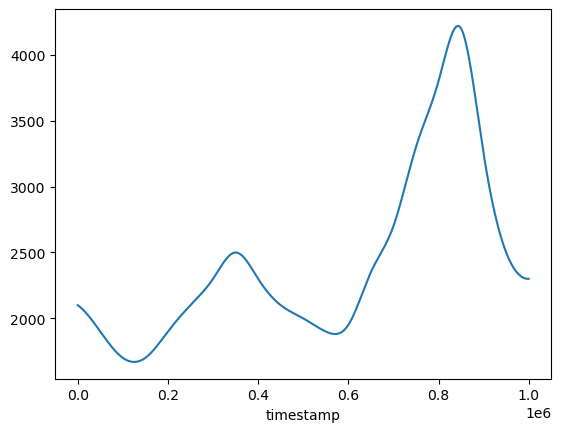

In [186]:
df_3["SUNLIGHT"].plot()

In [188]:
len(df_1)*7/24

2916.375

<Axes: xlabel='timestamp'>

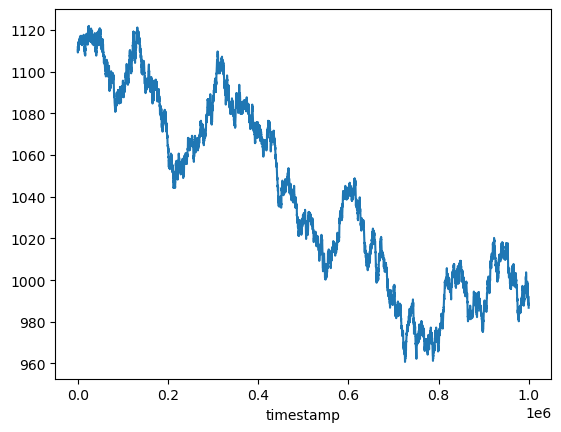

In [183]:
df_2["ORCHIDS"].plot()

In [141]:
#maybe there is some lag that we need to surveil

In [ ]:
accuracy()